<a href="https://colab.research.google.com/github/urazalinuraliev/Market-sales-prediction/blob/main/Supermarket_pridect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

## Loading Dataset

In [ ]:
data = pd.read_csv('sotuvlar.csv')

In [ ]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
data.shape

(1000, 17)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [ ]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'])

data['Day'] = (data['Date']).dt.day
data['Month'] = (data['Date']).dt.month
data['Month'] = (data['Month']).apply(lambda x: calendar.month_name[x])
data['Hour'] = (data['Time']).dt.hour

In [ ]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-10-15 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,January,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-10-15 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,March,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-10-15 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,March,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-10-15 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,January,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2023-10-15 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,February,10


In [ ]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270,15.256000,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858,8.693563,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000,1.000000,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000,8.000000,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000,15.000000,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000,23.000000,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000,31.000000,20.000000


In [ ]:
cor = data.corr()
cor

<ipython-input-11-e8715df75048>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Hour
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,0.057021,0.008242
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,-0.043347,-0.007317
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.002770
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.002770
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.002770
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.002770
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,-0.007076,-0.030588
Day,0.057021,-0.043347,-0.002515,-0.002515,-0.002515,NaN,-0.002515,-0.007076,1.000000,0.020668
Hour,0.008242,-0.007317,-0.002770,-0.002770,-0.002770,NaN,-0.002770,-0.030588,0.020668,1.000000


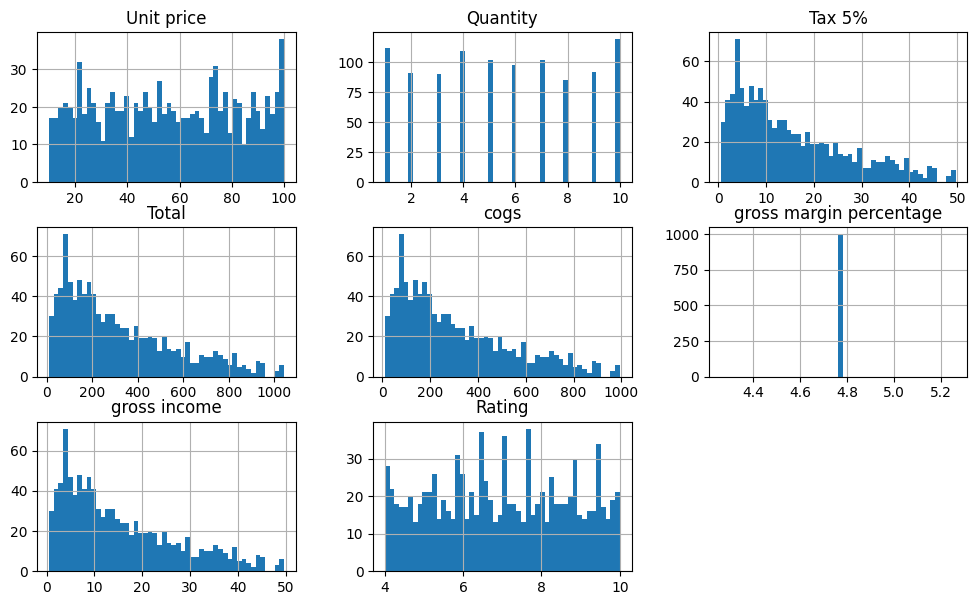

In [ ]:
column = ["Unit price","Quantity","Tax 5%","Total","cogs","gross margin percentage","gross income","Rating"]
data[column].hist(bins=50, figsize=(12,7))
plt.show()

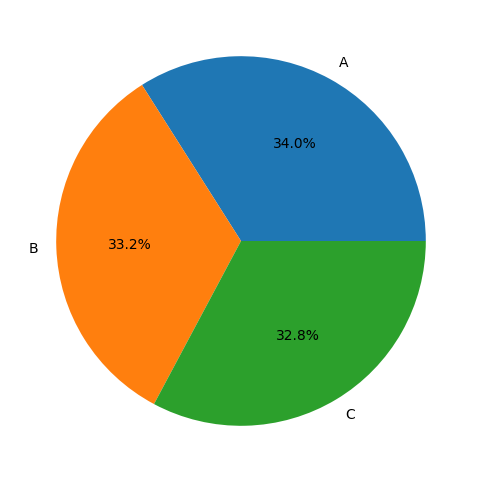

In [ ]:
plt.figure(figsize = (12,6))
branch = data.Branch.value_counts().reset_index()
plt.pie(branch.Branch, labels = branch['index'],autopct='%1.1f%%')
plt.show()

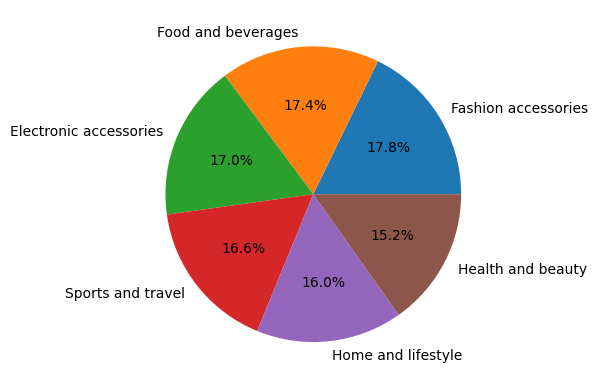

In [ ]:
product_line = data['Product line'].value_counts().reset_index()
plt.pie(product_line['Product line'], labels=product_line['index'], autopct='%1.1f%%')
plt.show()

<Axes: xlabel='Gender'>

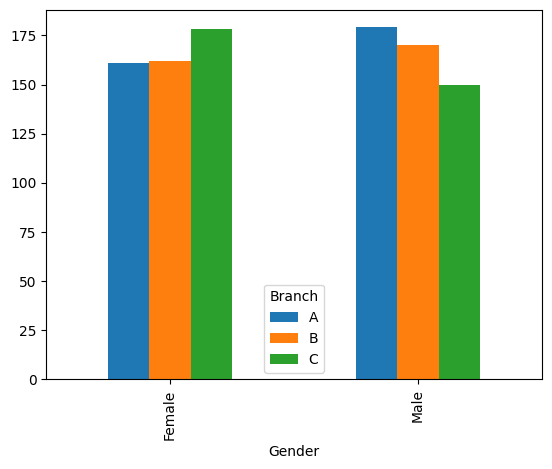

In [ ]:
data.groupby(['Branch', 'Gender']).size().unstack(0).plot.bar()

<Axes: xlabel='Branch', ylabel='Rating'>

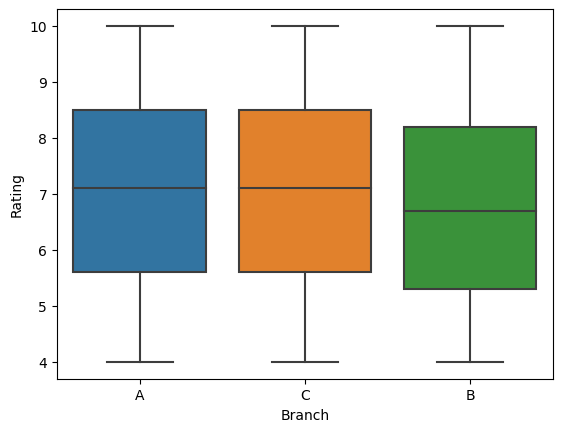

In [ ]:
sns.boxplot(x='Branch', y='Rating', data = data)

<Axes: xlabel='count', ylabel='Product line'>

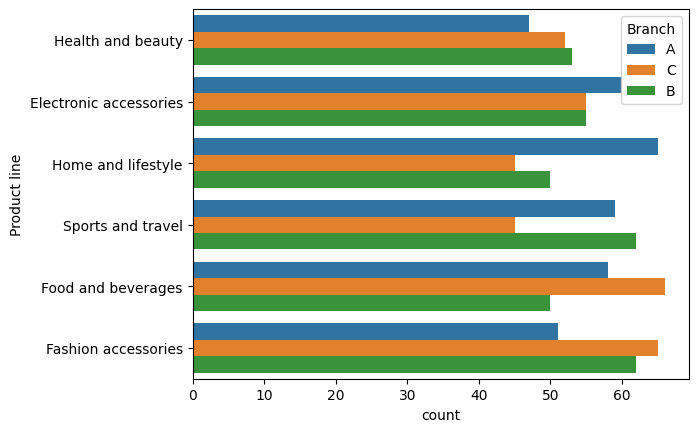

In [ ]:
sns.countplot(y='Product line',hue='Branch',data=data)

<Axes: xlabel='Rating', ylabel='Product line'>

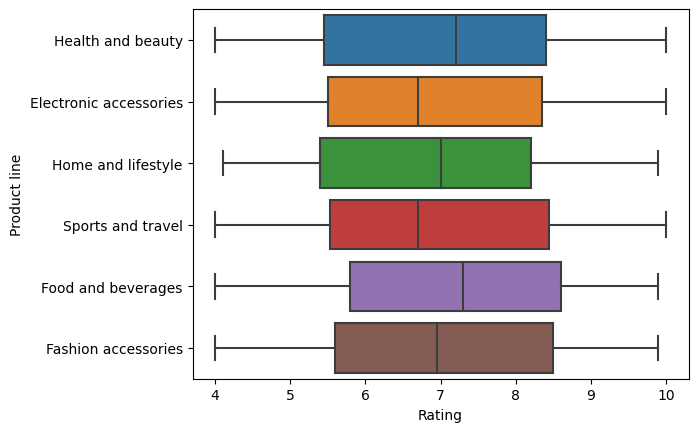

In [ ]:
sns.boxplot(y = 'Product line', x = 'Rating', data=data)

<Axes: xlabel='Total', ylabel='Product line'>

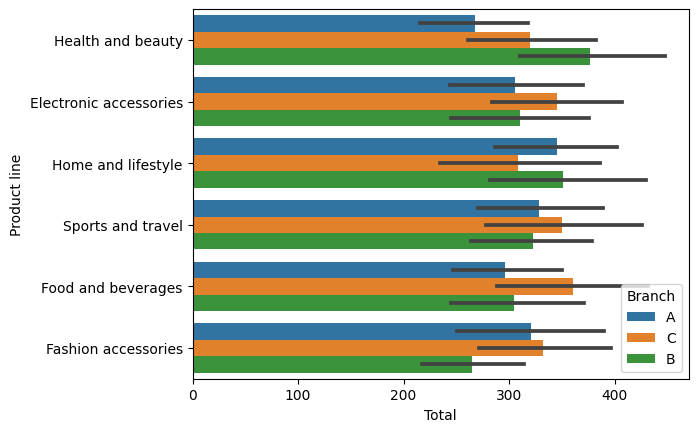

In [ ]:
sns.barplot(x='Total',hue='Branch',y = 'Product line',data=data)

<Axes: xlabel='Total', ylabel='Branch'>

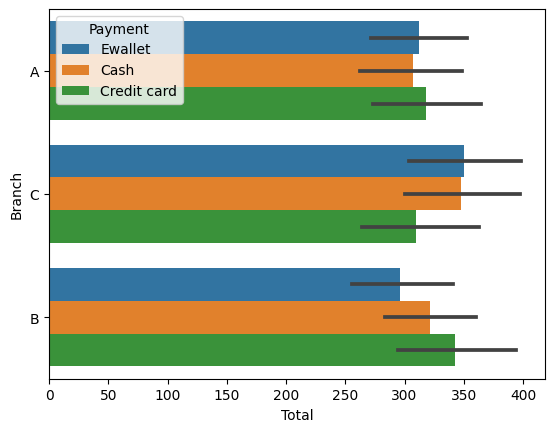

In [ ]:
sns.barplot(x='Total', hue='Payment', y = 'Branch', data=data)

<Axes: xlabel='Hour', ylabel='Total'>

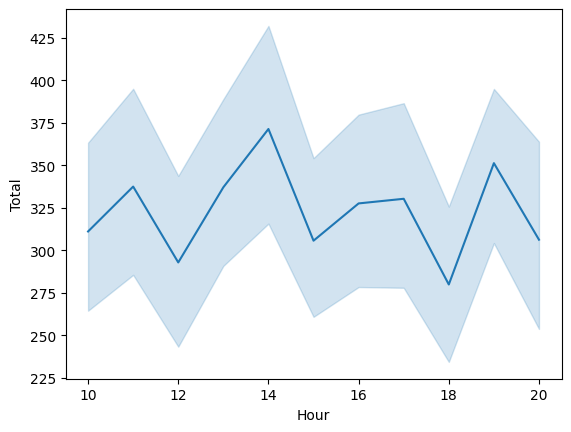

In [ ]:
sns.lineplot(x="Hour",  y = 'Total',data =data)

<Axes: xlabel='Hour', ylabel='Quantity'>

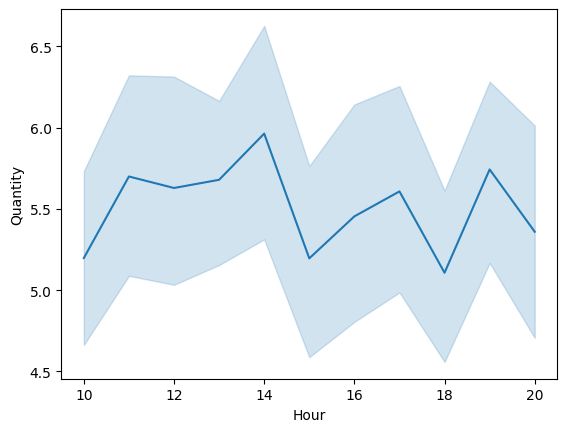

In [ ]:
sns.lineplot(x="Hour",  y='Quantity', data=data)

<Axes: xlabel='Month', ylabel='Total'>

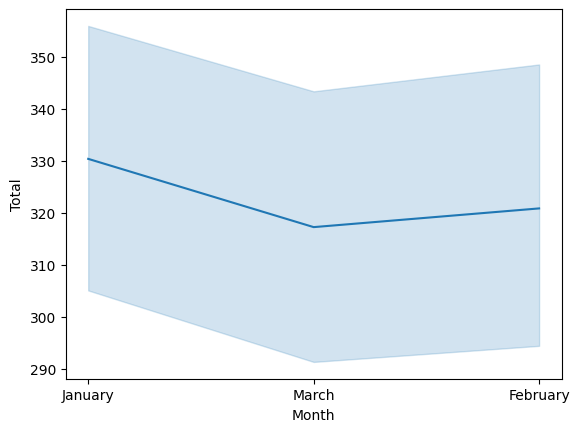

In [ ]:
sns.lineplot(x="Month",  y='Total', data=data)

<Axes: xlabel='Month', ylabel='Quantity'>

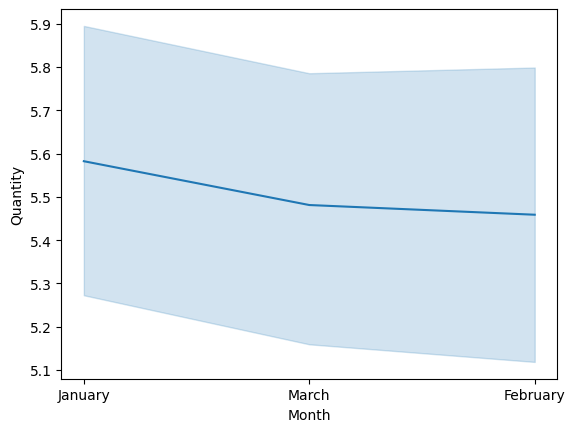

In [ ]:
sns.lineplot(x="Month",  y='Quantity', data=data)

## Data Preparation

In [ ]:
data.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-10-14 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,January,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-10-14 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,March,10


In [ ]:
data_clean = data.drop(columns=['Invoice ID', 'Date', 'Time', 'gross margin percentage'])
data_clean.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Day,Month,Hour
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,5,January,13
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,8,March,10
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,3,March,13
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,27,January,20
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,8,February,10


In [ ]:
binary_feature = data_clean.nunique()[data_clean.nunique() == 2].keys().tolist()

In [ ]:
binary_feature

['Customer type', 'Gender']

In [ ]:
LB_encoder = LabelEncoder()
for i in binary_feature:
    data_clean[i] = LB_encoder.fit_transform(data_clean[i])

In [ ]:
data_clean = pd.get_dummies(data_clean)
data_clean.head()

,Customer type,Gender,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,Day,...,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet,Month_February,Month_January,Month_March
0,0,0,74.69,7,26.1415,548.9715,522.83,26.1415,9.1,5,...,0,1,0,0,0,0,1,0,1,0
1,1,0,15.28,5,3.8200,80.2200,76.40,3.8200,9.6,8,...,0,0,0,0,1,0,0,0,0,1
2,1,1,46.33,7,16.2155,340.5255,324.31,16.2155,7.4,3,...,0,0,1,0,0,1,0,0,0,1
3,0,1,58.22,8,23.2880,489.0480,465.76,23.2880,8.4,27,...,0,1,0,0,0,0,1,0,1,0
4,1,1,86.31,7,30.2085,634.3785,604.17,30.2085,5.3,8,...,0,0,0,1,0,0,1,1,0,0


In [ ]:
data_clean.corr()

In [ ]:
data_clean = data_clean.drop(columns = ["Tax 5%","cogs","gross income","City_Mandalay","City_Naypyitaw","City_Yangon"])

In [ ]:
data_clean.columns

Index(['Customer type', 'Gender', 'Unit price', 'Quantity', 'Total', 'Rating',
       'Day', 'Hour', 'Branch_A', 'Branch_B', 'Branch_C',
       'Product line_Electronic accessories',
       'Product line_Fashion accessories', 'Product line_Food and beverages',
       'Product line_Health and beauty', 'Product line_Home and lifestyle',
       'Product line_Sports and travel', 'Payment_Cash', 'Payment_Credit card',
       'Payment_Ewallet', 'Month_February', 'Month_January', 'Month_March'],
      dtype='object')

## Create a model


In [ ]:
X = data_clean.drop(columns=["Total"])
y = data_clean["Total"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=15)

In [ ]:
SD_scaler = StandardScaler()
X_train = SD_scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns = X.columns)
X_test = SD_scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns = X.columns)

In [ ]:
X_train = X_train.drop(columns = ["Payment_Credit card","Product line_Food and beverages","Product line_Electronic accessories","Product line_Health and beauty"])
X_test = X_test.drop(columns = ["Payment_Credit card","Product line_Food and beverages","Product line_Electronic accessories","Product line_Health and beauty"])

In [ ]:
LR_model = LinearRegression()
model_data = LR_model.fit(X_train, y_train)
y_test_pred = model_data.predict(X_test)

mean_sq = mean_squared_error(y_test, y_test_pred)
print(f"Linear Regression Model RMSE: ", np.sqrt(mean_sq))

mean_abs = mean_absolute_error(y_test, y_test_pred)
print(f"Linear Regression Model MAE: ", mean_abs)

Linear Regression Model RMSE:  83.06294036841496
Linear Regression Model MAE:  63.28134721459518


In [ ]:
lin_scores = cross_val_score(estimator=model_data,X=X_train,y=y_train,scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [75.37652374 85.40539469 77.12725957 85.33450452 96.26889367 81.06426553
 86.64954839 87.74766918 75.38907617 73.90056738]
Mean: 82.4263702858641
Standard deviation: 6.759791445231156
